In [287]:
from datetime import datetime 
from time import process_time
import timeit
import time
import random
import math
import numpy as np
import copy
from matplotlib import pyplot as plt

# a) Merge, Insertion, Hybrid Sort Algo

In [307]:
#Mergesort Algo
def mergeSort(arr):

  noComp = 0;
  totComp = 0;
  n = len(arr)
  mid = n//2
  
  if mid<=0:
    return 0
  else:
    leftList = arr[:mid]
    rightList = arr[mid:]

    totComp += mergeSort(leftList)
    totComp += mergeSort(rightList)

    mainCount = leftCount = rightCount = 0

    while leftCount < len(leftList) and rightCount < len(rightList):
      if leftList[leftCount] < rightList[rightCount]:
        arr[mainCount] = leftList[leftCount]
        leftCount += 1
      else:
        arr[mainCount] = rightList[rightCount]
        rightCount += 1

      noComp += 1
      totComp += 1
      mainCount += 1

    while leftCount < len(leftList):
      arr[mainCount] = leftList[leftCount]
      leftCount += 1
      mainCount += 1
    
    while rightCount < len(rightList):
      arr[mainCount] = rightList[rightCount]
      rightCount += 1
      mainCount += 1

    return totComp 

In [308]:
#Insertion Algo
def insertionSort(arr):
  totComp = 0
  n = len(arr)

  if n >= 1:
    for i in range(n):
      for j in range(i, 0, -1):
        totComp += 1
        if arr[j] < arr[j-1]:
          temp = arr[j]
          arr[j] = arr[j-1]
          arr[j-1] = temp
        else:
          break
    return totComp
  else:
    return 0

In [309]:
#HybridSort Algo
def mergeInsertHybrid(arr, S):
  noComp = 0;
  totComp = 0;
  n = len(arr)

  if n <= S:
    if n > 1:
      for i in range(n):
        for j in range(i, 0, -1):
          noComp += 1
          totComp += 1
          if arr[j] < arr[j-1]:
            temp = arr[j]
            arr[j] = arr[j-1]
            arr[j-1] = temp
          else:
            break
    else:
      return 0
  else:
    mid = n//2

    leftList = arr[:mid]
    rightList = arr[mid:]

    totComp += mergeInsertHybrid(leftList, S)
    totComp += mergeInsertHybrid(rightList, S)

    mainCount = leftCount = rightCount = 0

    while leftCount < len(leftList) and rightCount < len(rightList):
      if leftList[leftCount] < rightList[rightCount]:
        arr[mainCount] = leftList[leftCount]
        leftCount += 1
      else:
        arr[mainCount] = rightList[rightCount]
        rightCount += 1

      noComp += 1
      totComp += 1
      mainCount += 1

    while leftCount < len(leftList):
      arr[mainCount] = leftList[leftCount]
      leftCount += 1
      mainCount += 1
    
    while rightCount < len(rightList):
      arr[mainCount] = rightList[rightCount]
      rightCount += 1
      mainCount += 1

  return totComp 

In [310]:
def printList(arr):
  for i in range(len(arr)):
    print(arr[i], end=" ")
  print()

In [313]:
print("Testing...")
print("")
arr = [6,3,8,4,5,8,2,4,5,6,7,8,3,2,5,6]

print("Array:")
printList(arr)
print("")
print("Comparision:", insertionSort(arr)) #mergeInsertHybrid(arr, 5) #mergeSort(arr)

print("")
print("Sorted Array:")
printList(arr)

Testing...

Array:
6 3 8 4 5 8 2 4 5 6 7 8 3 2 5 6 

Comparision: 67

Sorted Array:
2 2 3 3 4 4 5 5 5 6 6 6 7 8 8 8 


# b) Generate dataset (custom input: 1k to 10millions)

In [298]:
def generate_int_dataset(size, range_max):

  dataset = []
  for i in range(size):
    dataset.append(random.randint(0, range_max))
  return dataset

In [302]:
print("Testing...")
print("")

print("Create dataset of size n=100, range: 0-100...")
print("")
print(generate_int_dataset(100, 100))

Testing...

Create dataset of size n=100, range: 0-100...

[27, 33, 22, 99, 25, 14, 37, 73, 26, 15, 74, 78, 3, 39, 6, 65, 99, 63, 86, 4, 67, 5, 47, 45, 51, 88, 29, 60, 82, 81, 4, 66, 61, 86, 87, 83, 79, 62, 100, 5, 25, 85, 36, 43, 27, 61, 4, 0, 64, 16, 33, 33, 84, 35, 46, 10, 3, 4, 85, 94, 1, 58, 39, 3, 19, 77, 88, 41, 3, 78, 88, 81, 58, 39, 17, 88, 39, 2, 28, 69, 60, 98, 8, 50, 17, 74, 82, 86, 27, 1, 70, 20, 43, 61, 24, 27, 20, 74, 92, 35]


In [68]:
def copy_dataset(dataset):

  copied_dataset = []

  for elem in dataset:
    copied_dataset.append(elem)

  return copied_dataset

# ci) Hybrid Sort: Fixed S, N: 1k to 10millions

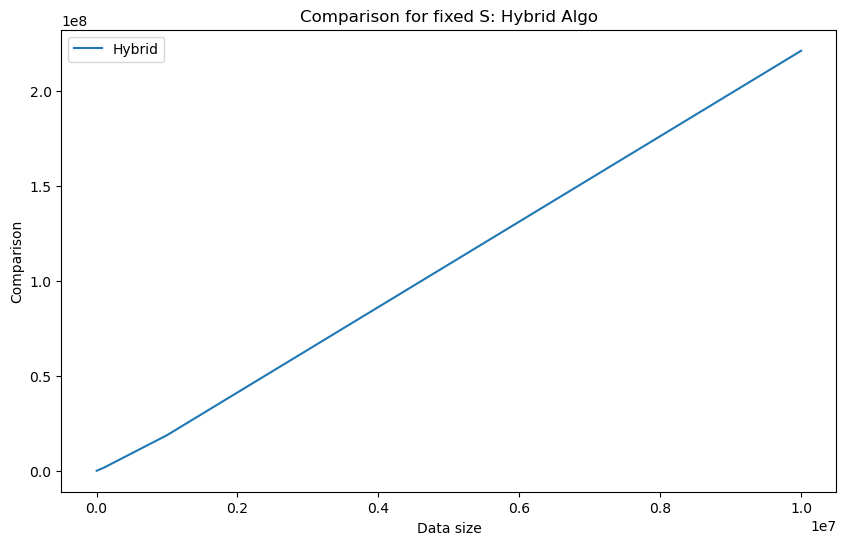

In [246]:
import timeit
import matplotlib.pyplot as plt

def main():
  datacount = [1000, 10000, 100000, 1000000, 10000000]
  s = 5

  hybrid_runtime = []
  hybrid_comparision = []

  #Run the generate_int_dataset() function 5 times for each data size
  for i in range(len(datacount)):
    dataset = generate_int_dataset(datacount[i], datacount[i])

    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(dataset, s))  
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

  plt.figure(figsize=(10, 6))
  plt.plot(datacount, hybrid_comparision, label="Hybrid")

  plt.xlabel("Data size")
  plt.ylabel("Comparison")
  plt.title("Comparison for fixed S: Hybrid Algo")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()

# ci) Hybrid Sort: Fixed N, S(1 to 50)

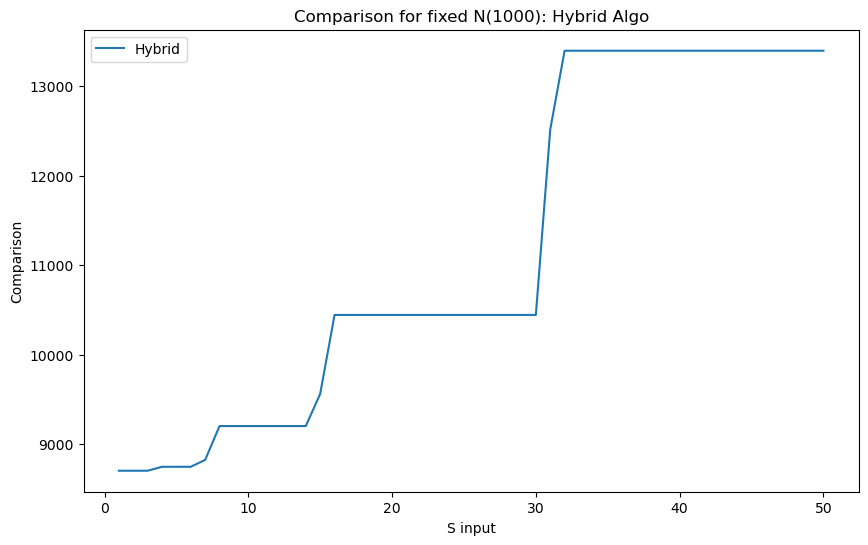

In [271]:
def main():
    
  dataset = generate_int_dataset(1000, 1000)
  
  s = []
  for i in range(1, 51):
    s.append(i)

  hybrid_runtime = []
  hybrid_comparision = []

  #Run the generate_int_dataset() function 50 times for each S input
  for i in range(len(s)):

    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(copy.copy(dataset), s[i]))  
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

  plt.figure(figsize=(10, 6))
  plt.plot(s, hybrid_comparision, label="Hybrid")

  plt.xlabel("S input")
  plt.ylabel("Comparison")
  plt.title("Comparison for fixed N(1000): Hybrid Algo")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()

# c) Conclusion

We know that insertion sort is faster in situation:
- array is already sorted/ nearly sorted
- array is small
- computer has fast cache

From the analysis, we concluded that the optimal range of S is from 0-10 for dataset of 1k to 10million.

However there is no formula to get the best S.

The best value S depends on the specific data set being sorted. In general, a higher S value is better for data sets that are already somewhat sorted.

An approach to find the optimal S will be using exhaustive search, given we narrow down the range to 0-10. We will try every possible value of S from 0-10 to find the best S for a specific dataset.

### Approach: Exhaustive search using S from range 0-10 for dataset from 1k to 10million

# Compare Hybridsort with Mergesort (S=5)

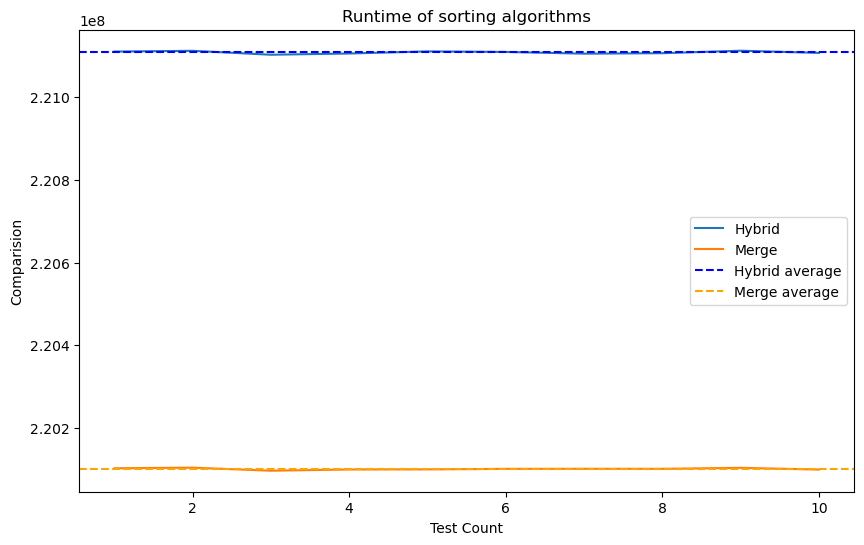

In [305]:
def main():
  dataCount = 10000000
  s = 5
  count = [] 
  for i in range(1, 11):
    count.append(i)

  hybrid_runtime = []
  merge_runtime = []
  hybrid_comparision = []
  merge_comparision = []

  #Run the generate_int_dataset() function 10 times for different set of random data
  for i in range(len(count)):
    dataset = generate_int_dataset(dataCount, dataCount)

    #Get the runtime for the hybrid, merge sort algorithms
    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(copy.copy(dataset), s))     
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

    start_time = timeit.default_timer()
    merge_comparision.append(mergeSort(copy.copy(dataset)))  
    end_time = timeit.default_timer()
    merge_runtime.append(round(end_time - start_time, 6))
    
  #Calculate the average runtime for each algorithm
  hybrid_average_runtime = np.mean(hybrid_comparision)
  merge_average_runtime = np.mean(merge_comparision)

  #Plot the runtime of the algorithms
  plt.figure(figsize=(10, 6))
  plt.plot(count, hybrid_comparision, label="Hybrid")
  plt.plot(count, merge_comparision, label="Merge")

  plt.axhline(hybrid_average_runtime, color="blue", linestyle="--", label="Hybrid average")
  plt.axhline(merge_average_runtime, color="orange", linestyle="--", label="Merge average")

  plt.xlabel("Test Count")
  plt.ylabel("Comparision")
  plt.title("Runtime of sorting algorithms")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()

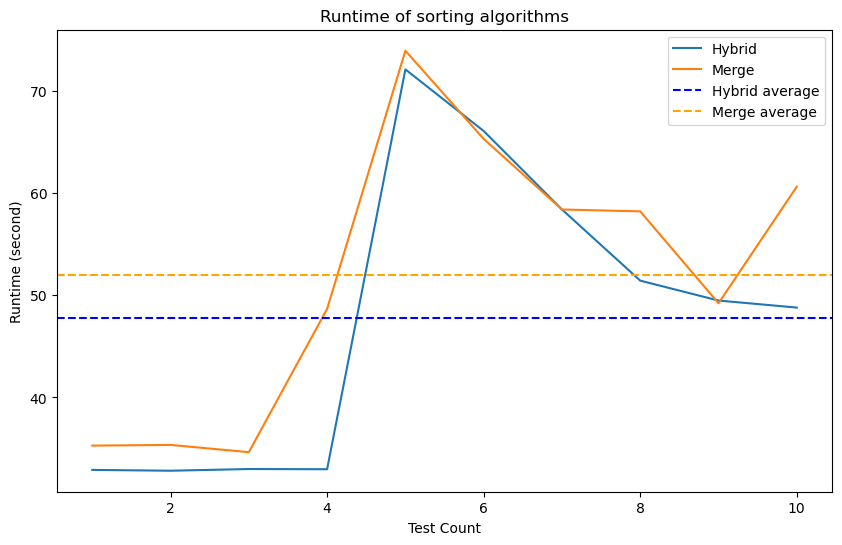

In [306]:
import numpy as np

def main():
  dataCount = 10000000
  s = 5
  count = [] 
  for i in range(1, 11):
    count.append(i)

  hybrid_runtime = []
  merge_runtime = []
  hybrid_comparision = []
  merge_comparision = []

  #Run the generate_int_dataset() function 10 times for different set of random data
  for i in range(len(count)):
    dataset = generate_int_dataset(dataCount, dataCount)

    #Get the runtime for the hybrid, merge sort algorithms
    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(copy.copy(dataset), s))     
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

    start_time = timeit.default_timer()
    merge_comparision.append(mergeSort(copy.copy(dataset)))  
    end_time = timeit.default_timer()
    merge_runtime.append(round(end_time - start_time, 6))

  #Calculate the average runtime for each algorithm
  hybrid_average_runtime = np.mean(hybrid_runtime)
  merge_average_runtime = np.mean(merge_runtime)

  #Plot the runtime of the algorithms
  plt.figure(figsize=(10, 6))
  plt.plot(count, hybrid_runtime, label="Hybrid")
  plt.plot(count, merge_runtime, label="Merge")

  plt.axhline(hybrid_average_runtime, color="blue", linestyle="--", label="Hybrid average")
  plt.axhline(merge_average_runtime, color="orange", linestyle="--", label="Merge average")

  plt.xlabel("Test Count")
  plt.ylabel("Runtime (second)")
  plt.title("Runtime of sorting algorithms")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()


# d) Conclusion

Interestingly Hybrid sort on average have a higher **comparision** vs <font color='green'>Merge sort</font>.

However, the **CPU runtime** for <font color='green'>Hybrid sort</font>  is faster than Merge sort.

CPU runtime for a hybrid sort can be faster than merge sort because insertion sort is a more cache-friendly algorithm than merge sort. Cache-friendly algorithms are those that access data that is stored in the CPU's cache memory more often. This can lead to faster execution times because the CPU does not have to access the slower main memory as often.